# BERT topic modeling 

The code is adapted from https://maartengr.github.io/BERTopic/index.html#quick-start 

## Import pkgs 

In [1]:
from bertopic import BERTopic

# for word + document embedding
from bertopic.backend import WordDocEmbedder
import gensim.downloader as api
from sentence_transformers import SentenceTransformer

import pandas as pd
import os
from sklearn.datasets import fetch_20newsgroups # for test data

# print every ouput
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# print the current wd 
os.getcwd()

# change the current wd 
os.chdir('/Users/jaeyeonkim/scraping_slsv')

'/Users/jaeyeonkim/scraping_slsv/code'

In [3]:
# check the current wd
os.getcwd()

'/Users/jaeyeonkim/scraping_slsv'

In [4]:
df = pd.read_csv('./outputs/filtered_df.csv')

In [5]:
# check the file 
df

,text,name
0,voter education voter turnout voter registrat...,2019-2020-Nazareth-College-Action-Plan.pdf
1,gw votes 2020 action plan honey w nashman cen...,2020-Action-Plan-FINAL.pdf
2,tricia debertolis alfred university 1 saxon dr...,Action-Plan-Alfred.pdf
3,allegany college all in one campus plan to in...,Action-Plan-Allegany-College.pdf
4,all in campus democracy challenge 2016 action...,Action-Plan-Anne-Arundel-Community-College.pdf
...,...,...
1221,voter education engagement master plan 429 n c...,Wofford-College-Action-Plan-2018.pdf
1222,voter education engagement action plan 2022 ex...,Wofford-College-Action-Plan-2022-May.pdf
1223,worcester state university has aimed to increa...,Worcester-State-University-Action-Plan-2018.pdf
1224,worcester state university 2020 action plan th...,Worcester-State-University-Action-Plan-2020.pdf


## BERT topic modeling

### Training

In [9]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(stop_words="english")

docs = df['text']

In [109]:
# dimension reduction tools
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', prediction_data=True)

from sklearn.decomposition import PCA

dim_model = PCA(n_components=5)

In [110]:
# importing random module
import random
 
random.seed(1234)

In [56]:
# embeddings
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(docs, show_progress_bar=False)

In [111]:
topic_model = BERTopic(nr_topics="auto", # topic reduction
                      n_gram_range = (1,2), 
                      embedding_model=sentence_model, # embedding model
                      vectorizer_model=vectorizer_model, # remove stop words
                      #diversity=0.2, # diversify topic representation
                      umap_model=umap_model, # dimension reduction 
                      hdbscan_model=hdbscan_model) # reducing the embeddings with HDBSCAN

In [112]:
topics, probs = topic_model.fit_transform(docs, embeddings)

In [113]:
# save model
topic_model.save('./outputs/my_model')

In [114]:
# load model 
BERTopic.load('./outputs/my_model')

In [115]:
topic_model.get_topic_info() 

,Topic,Count,Name
0,-1,419,-1_students_voter_student_campus
1,0,275,0_engagement_students_civic_student
2,1,66,1_voter_registration_students_dickinson
3,2,56,2_campus_following_plan_nslve
4,3,48,3_students_voter_student_engagement
5,4,35,4_campus_voter_students_engagement
6,5,30,5_michigan_students_voter_campus
7,6,30,6_texas_campus_engagement_voter
8,7,29,7_asu_arizona_voter_student
9,8,25,8_denver_colorado_students_engagement


In [116]:
topic_model.get_topic(0)[:20]

[('engagement', 0.0253983872443696),
 ('students', 0.023991690865601215),
 ('civic', 0.02275309123000018),
 ('student', 0.02101951731144259),
 ('campus', 0.020538441011722478),
 ('community', 0.01963391640061892),
 ('voter', 0.01793086086413207),
 ('learning', 0.015423496062916563),
 ('plan', 0.014962420823587253),
 ('registration', 0.014593436629908585)]

### Visualization

In [117]:
fig = topic_model.visualize_topics()
fig.write_html("./outputs/topic.html")

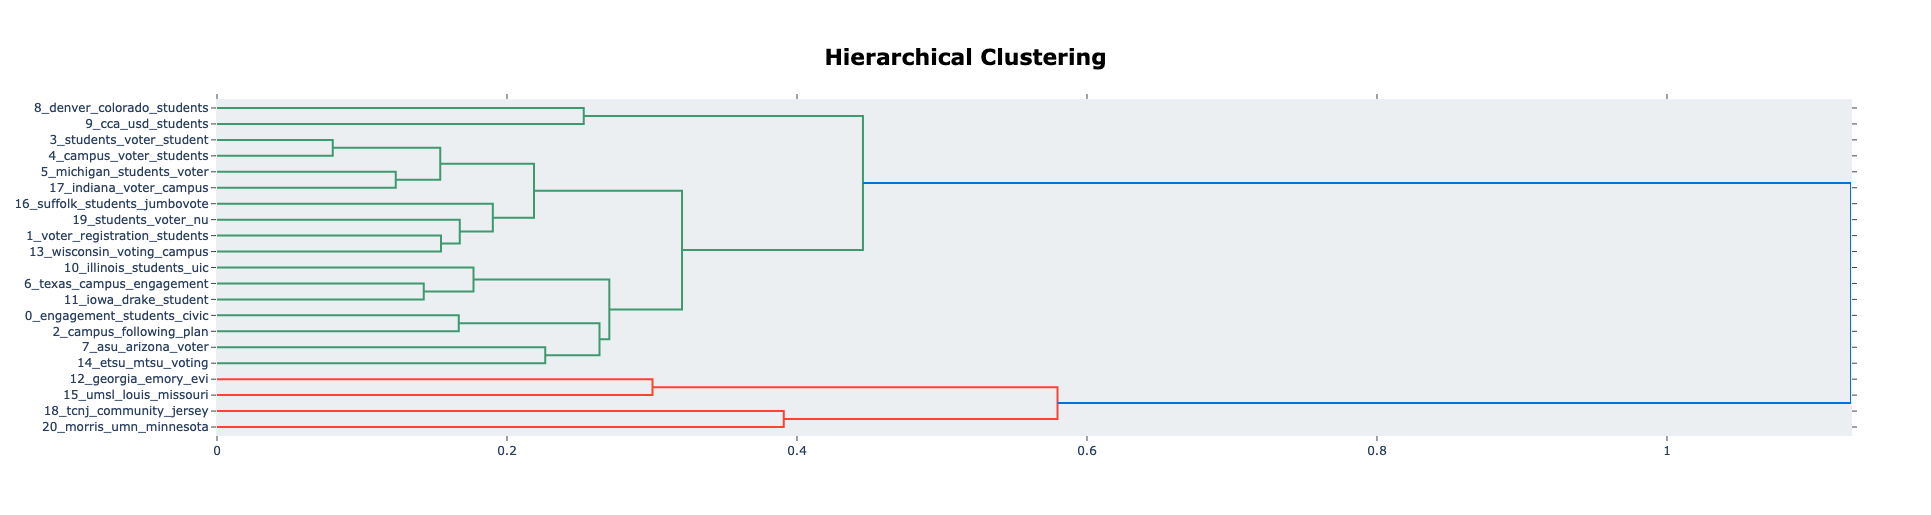

In [118]:
topic_model.visualize_hierarchy()

topic_model.visualize_hierarchy().write_html("./outputs/hierarchy.html")

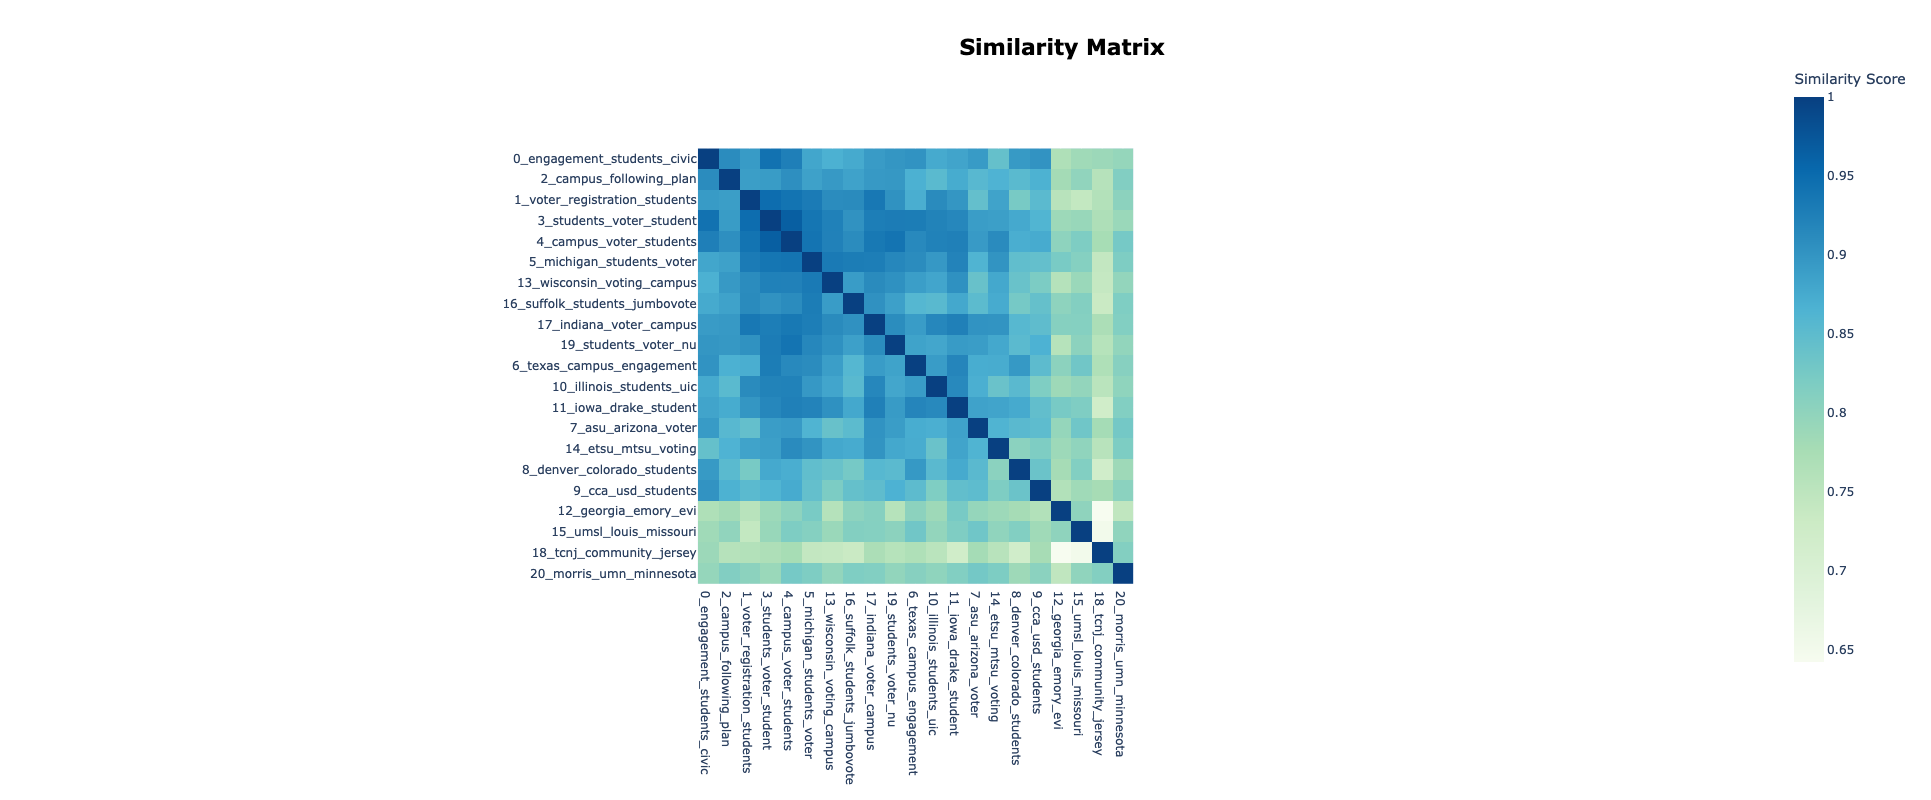

In [122]:
topic_model.visualize_heatmap(n_clusters = 10)

topic_model.visualize_heatmap().write_html("./outputs/similarity.html")